
Classification with Neural Networks

Last Updated: February 20th, 2025

Daily Challenge: Classification with Neural Networks in TensorFlow


👩‍🏫 👩🏿‍🏫 What You'll learn

    Understand the different types of classification: Binary, Multi-class, and Multi-label
    Learn how to build a Neural Network for Classification using TensorFlow
    Improve model performance by adding layers, neurons, and using activation functions
    Visualize decision boundaries to understand model predictions


🛠️ What you will create

    A Neural Network model for classification using TensorFlow
    Visualizations of data distribution and decision boundaries
    Model performance evaluation on training and test sets
    Experimentation with activation functions and optimizers


📖 Useful Resources

    multiclass-classification-vs-multi-label-classification
    getting-started-with-classification


What You Need to Do

1. Understand Classification Types

    Read about Binary Classification, Multi-class Classification, and Multi-label Classification.
    Write a brief explanation of each type with an example.


2. Set Up Your Python Environment and dataset

    Ensure you have the required libraries installed:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles


It is time for creating a dataset to work on:

from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)


    Visualize the dataset using scatter plots to understand the data distribution.


3. Build a Basic Neural Network Model

    Create a Sequential Model in TensorFlow with one dense layer.
    Use Binary Crossentropy as the loss function.
    Train the model and check the accuracy.


4. Improve the Model

    Add more layers and neurons to the model.
    Train the model for more epochs.
    Try different optimizers like Adam instead of SGD.


5. Visualize the Decision Boundary

    Implement a function plot_decision_boundary() to visualize model predictions.
    Plot decision boundaries for different models and compare results.


6. Incorporate Activation Functions

    Explore ReLU and Sigmoid activation functions.
    Modify the neural network to include these activation functions.
    Train the new model and compare performance.


7. Split Data into Training and Testing Sets

    Use 80% data for training and 20% for testing.
    Train the improved model on the training set.
    Evaluate model performance on the test set.


8. Evaluate and Visualize Final Model Performance

    Check loss and accuracy on the test set.
    Use plot_decision_boundary() to visualize predictions for both training and test data.
    Compare results and analyze improvements.


9. Summarize Key Takeaways

    Write a short summary of what you learned.
    Highlight the importance of visualizing data and tuning hyperparameters to improve classification models.


Classification binaire

    deux classes exclusives (0 ou 1).

    détection de spam (spam / non-spam).

• Classification multi-classe

    plus de deux classes, une seule vraie classe par échantillon.

    reconnaissance d'animaux (chien / chat / lapin).

• Classification multi-étiquette

    plusieurs labels peuvent être vrais simultanément.

    étiquetage d'images où une même image peut contenir plusieurs objets (chien + voiture).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

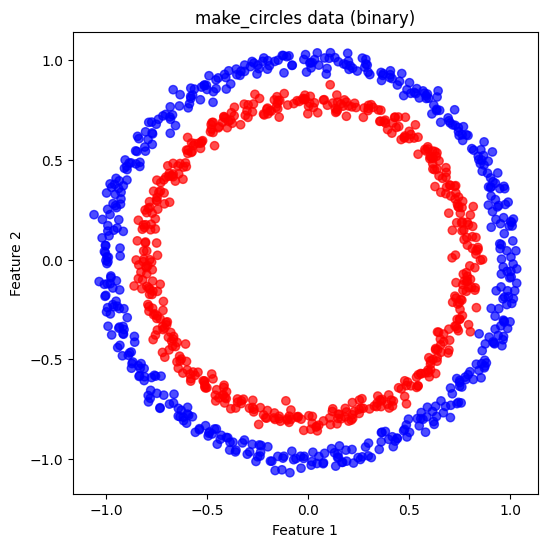

In [3]:
# dataset
samples = 1000
X, y = make_circles(n_samples=samples, noise=0.03, random_state=42)

# visu
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("make_circles data (binary)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

un modèle linéaire simple ne pourra pas separer les classes convenablement.

In [5]:
model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=20, verbose=0)

print("Accuracy (modèle avec Input layer) :", history.history['accuracy'][-1])

Accuracy (modèle avec Input layer) : 0.5


In [6]:
model = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(2,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=0)

print("Accuracy (modèle amélioré) :", history.history['accuracy'][-1])

Accuracy (modèle amélioré) : 1.0


ce modèle linéaire ne capture pas la non-linéarité du problème, donc l'accuracy sera proche de 0.5.

Ajouter des couches cachées permet d'apprendre des représentations plus complexes.

L'optimiseur Adam converge souvent plus rapidement et efficacement que SGD.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


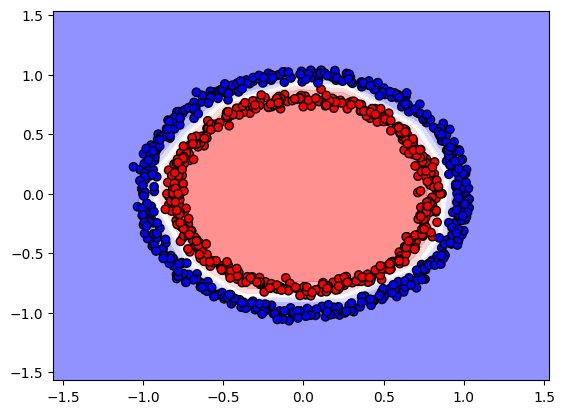

In [ ]:
def plot_decision_boundary(model, X, y, steps=100, cmap='bwr'):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.5, cmap=cmap)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolor='k')
    plt.show()

# exec
plot_decision_boundary(model, X, y)

le modèle sépare l'espace d'entrée en zones de prédiction pour chaque classe.

ReLU efficace pour les couches cachées, résout le problème du gradient qui disparaît.

Sigmoid adaptée à la sortie binaire , mais à éviter dans les couches cachées pour tâches complexes.

Test loss: 0.0526, Test accuracy: 1.0000
Frontière sur train :
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step


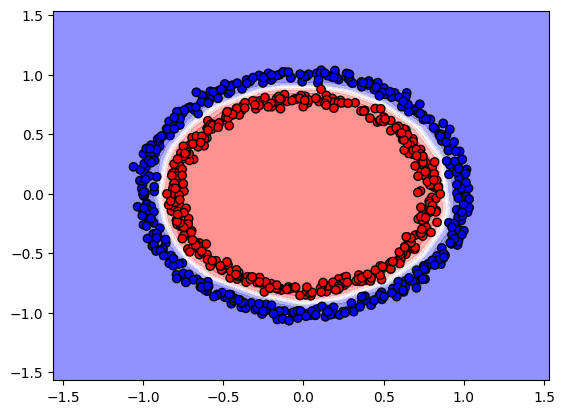

Frontière sur test :
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


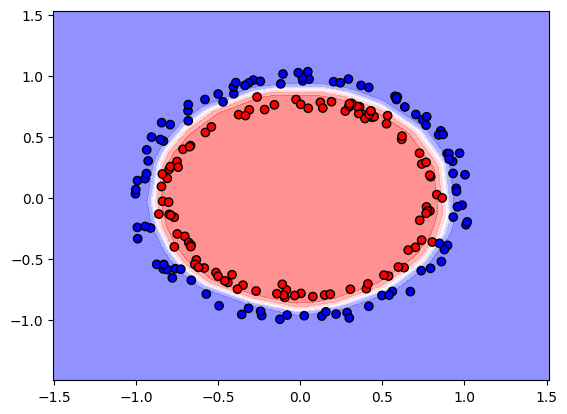

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# visu
print("Frontière sur train :")
plot_decision_boundary(model, X_train, y_train)
print("Frontière sur test :")
plot_decision_boundary(model, X_test, y_test)

L'accuracy sur test permet de voir si le modèle généralise.

Visualiser les frontières sur train vs test révèle si le modèle sur-apprend ou non.